In [1]:
import pandas as pd
import glob, os
import numpy as np
import datetime as dt
import seaborn as sns

In [2]:
ls

beat_crime/  crime_clean/  Crime_years_merge.ipynb*  Untitled.ipynb*


In [3]:
ls crime_clean/

beat_10H10.csv*  beat_10H70.csv*     crime11_clean.csv*  crime16_clean.csv*
beat_10H30.csv*  beat_10H80.csv*     crime12_clean.csv*  crime17_clean.csv*
beat_10H40.csv*  beat_15E40.csv*     crime13_clean.csv*
beat_10H50.csv*  beat_1A10.csv*      crime14_clean.csv*
beat_10H60.csv*  crime10_clean.csv*  crime15_clean.csv*


In [4]:
path = 'crime_clean/'

In [5]:
all_files = glob.glob(os.path.join(path, "*.csv")) 

df_from_each_file = (pd.read_csv(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [6]:
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date').sort_index(ascending=True)

In [7]:
df.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1914-09-08,24C60,12700-12799,lake houston,Burglary,restaurant or cafeteria,1.0,7.0,8,Tuesday,Sep,1914
1914-11-02,18F60,8800-8899,bellaire,Burglary,miscellaneous business (non-specific),1.0,3.0,2,Monday,Nov,1914
1914-12-03,12D20,12800-12899,gulf,Auto Theft,none,1.0,19.0,3,Thursday,Dec,1914
1915-01-05,3B10,3200-3299,mangum rd 180,Theft,other parking lot,1.0,22.0,5,Tuesday,Jan,1915
1915-01-14,5F10,7000-7099,westview,Auto Theft,apartment parking lot,1.0,23.0,14,Thursday,Jan,1915


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1075199 entries, 1914-09-08 to 2033-04-21
Data columns (total 11 columns):
Beat           1075199 non-null object
BlockRange     1075199 non-null object
StreetName     1075192 non-null object
OffenseType    1075199 non-null object
Premise        1075199 non-null object
NumOffenses    1075199 non-null float64
Hour           1075199 non-null float64
day            1075199 non-null object
weekday        1075199 non-null object
month          1075199 non-null object
year           1075199 non-null object
dtypes: float64(2), object(9)
memory usage: 98.4+ MB


## Check for null values

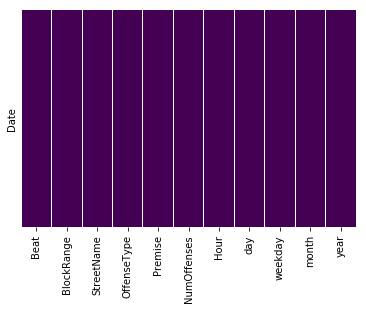

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
df.apply(lambda x: sum(x.isnull()))

Beat           0
BlockRange     0
StreetName     7
OffenseType    0
Premise        0
NumOffenses    0
Hour           0
day            0
weekday        0
month          0
year           0
dtype: int64

## year column

In [11]:
df.year.unique()

array([1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1924, 1926, 1927,
       1953, 1959, 1963, 1964, 1965, 1966, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2019, 2020, 2021, 2029, 2033], dtype=object)

## Slice year from 2010 - 2017

In [12]:
df = df['1/1/2010':'12/31/2017']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1072618 entries, 2010-01-01 to 2017-12-31
Data columns (total 11 columns):
Beat           1072618 non-null object
BlockRange     1072618 non-null object
StreetName     1072611 non-null object
OffenseType    1072618 non-null object
Premise        1072618 non-null object
NumOffenses    1072618 non-null float64
Hour           1072618 non-null float64
day            1072618 non-null object
weekday        1072618 non-null object
month          1072618 non-null object
year           1072618 non-null object
dtypes: float64(2), object(9)
memory usage: 98.2+ MB


In [14]:
df.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2010-01-01,5F30,13200-13299,northwest,Theft,department/discount store,1.0,22.0,1,Friday,Jan,2010
2010-01-01,20G10,9900-9999,richmond,Theft,apartment parking lot,1.0,16.0,1,Friday,Jan,2010
2010-01-01,14D20,8500-8599,rubin,Aggravated Assault,road/street/sidewalk,1.0,7.0,1,Friday,Jan,2010
2010-01-01,14D40,4200-4299,friar point,Burglary,residence/house,1.0,20.0,1,Friday,Jan,2010
2010-01-01,10H70,4800-4899,austin,Burglary,residence/house,1.0,21.0,1,Friday,Jan,2010


In [15]:
df.apply(lambda x: sum(x.isnull()))

Beat           0
BlockRange     0
StreetName     7
OffenseType    0
Premise        0
NumOffenses    0
Hour           0
day            0
weekday        0
month          0
year           0
dtype: int64

In [16]:
df.dtypes

Beat            object
BlockRange      object
StreetName      object
OffenseType     object
Premise         object
NumOffenses    float64
Hour           float64
day             object
weekday         object
month           object
year            object
dtype: object

## Select Beats

- 10H10
- 10H30
- 10H40
- 10H50
- 10H60
- 10H70
- 10H80
- 15E40
- 1A10

In [17]:
beats = ['10H10','10H30', '10H40', '10H50', '10H60','10H70', '10H80', '15E40', '1A10']

In [18]:
df.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2010-01-01,5F30,13200-13299,northwest,Theft,department/discount store,1.0,22.0,1,Friday,Jan,2010
2010-01-01,20G10,9900-9999,richmond,Theft,apartment parking lot,1.0,16.0,1,Friday,Jan,2010
2010-01-01,14D20,8500-8599,rubin,Aggravated Assault,road/street/sidewalk,1.0,7.0,1,Friday,Jan,2010
2010-01-01,14D40,4200-4299,friar point,Burglary,residence/house,1.0,20.0,1,Friday,Jan,2010
2010-01-01,10H70,4800-4899,austin,Burglary,residence/house,1.0,21.0,1,Friday,Jan,2010


In [19]:
df.Beat.value_counts(dropna=False)[:10]

1A10     30650
10H70    22846
19G10    21422
12D10    21242
1A20     20938
10H40    20920
6B60     20067
13D20    19135
3B10     18199
18F20    17541
Name: Beat, dtype: int64

In [20]:
selected_beats = df.Beat.isin(beats)

In [21]:
selected_beats.head()

Date
2010-01-01    False
2010-01-01    False
2010-01-01    False
2010-01-01    False
2010-01-01     True
Name: Beat, dtype: bool

## Split selected beats and save 

In [23]:
df_sb = df[selected_beats]

In [24]:
df_sb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 154132 entries, 2010-01-01 to 2017-12-31
Data columns (total 11 columns):
Beat           154132 non-null object
BlockRange     154132 non-null object
StreetName     154132 non-null object
OffenseType    154132 non-null object
Premise        154132 non-null object
NumOffenses    154132 non-null float64
Hour           154132 non-null float64
day            154132 non-null object
weekday        154132 non-null object
month          154132 non-null object
year           154132 non-null object
dtypes: float64(2), object(9)
memory usage: 14.1+ MB


In [25]:
df_sb.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2010-01-01,10H70,4800-4899,austin,Burglary,residence/house,1.0,21.0,1,Friday,Jan,2010
2010-01-01,10H50,3100-3199,ennis,Aggravated Assault,road/street/sidewalk,1.0,18.0,1,Friday,Jan,2010
2010-01-01,1A10,400-499,caroline,Theft,road/street/sidewalk,1.0,2.0,1,Friday,Jan,2010
2010-01-01,10H70,6500-6599,fannin,Aggravated Assault,hospital,1.0,19.0,1,Friday,Jan,2010
2010-01-01,10H60,4000-4099,canfield,Robbery,bank/saving institution parking lot,1.0,4.0,1,Friday,Jan,2010


In [26]:
df_sb.Beat.value_counts()

1A10     30650
10H70    22846
10H40    20920
15E40    16386
10H50    16034
10H60    15394
10H80    14962
10H30     8796
10H10     8144
Name: Beat, dtype: int64

In [27]:
print(list(df_sb.Beat.unique()))

['10H70', '10H50', '1A10', '10H60', '10H10', '15E40', '10H40', '10H30', '10H80']


In [28]:
beat_10H30 = df_sb[df_sb.Beat == '10H30']
beat_10H10 = df_sb[df_sb.Beat == '10H10']
beat_1A10 = df_sb[df_sb.Beat == '1A10']
beat_10H40 = df_sb[df_sb.Beat == '10H40']
beat_15E40 = df_sb[df_sb.Beat == '15H40']
beat_10H50 = df_sb[df_sb.Beat == '10H50']
beat_10H60 = df_sb[df_sb.Beat == '10H60']
beat_10H70 = df_sb[df_sb.Beat == '10H70']
beat_10H80 =  df_sb[df_sb.Beat == '10H80']
 

In [29]:
beat_10H10.to_csv('beat_crime/beat_10H10.csv')

In [30]:
beat_10H30.to_csv('beat_crime//beat_10H30.csv')

In [31]:
beat_10H40.to_csv('beat_crime//beat_10H40.csv')

In [32]:
beat_10H50.to_csv('beat_crime//beat_10H50.csv')

In [33]:
beat_10H60.to_csv('beat_crime//beat_10H60.csv')

In [34]:
beat_10H70.to_csv('beat_crime//beat_10H70.csv')

In [35]:
beat_10H80.to_csv('beat_crime//beat_10H80.csv')

In [36]:
beat_15E40.to_csv('beat_crime//beat_15E40.csv')

In [37]:
beat_1A10.to_csv('beat_crime//beat_1A10.csv')

In [40]:
ls beat_crime/

beat_10H10.csv*  beat_10H50.csv*  beat_10H80.csv*
beat_10H30.csv*  beat_10H60.csv*  beat_15E40.csv*
beat_10H40.csv*  beat_10H70.csv*  beat_1A10.csv*
